<a href="https://colab.research.google.com/github/nabila-nazzy/Jyro-Experiments/blob/main/Robot_Simulation_using_Jyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from: Blank, D.( 2017). Jyro Python Robot Simulator.[Computer Software].  https://jyro.readthedocs.io/en/latest/Jyro%20Simulator.html & Meeden, L. (n.d.). CS81 Adaptive Robotics Swarthmore College. https://www.cs.swarthmore.edu/~meeden/cs81/f17/labs/Lab1.html

Jyro contains a simulator (jyro.simulator) and controller for real robots (jyro.myro)

In [ ]:
!pip install Jyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.4 MB/s eta 0:00:00


In [ ]:
from jyro.simulator import *

In [ ]:
sim=Physics()

In [ ]:
 def make_world(sim):
    sim.addBox(0, 0, 5, 5, fill="backgroundgreen", wallcolor="lightgrey") # meters
    sim.addBox(1, 1, 2, 2, "purple")
    ## brightness of 1 is radius 1 meter
    sim.addLight(4, 4, 1.00, color=Color(255, 255, 0, 64))
    sim.addLight(4, 2, 1.00, color=Color(255, 255, 0, 64))

Using a simulated Pioneer robot based on a real, physical robot <img src= 'https://drive.google.com/uc?id=1l7766wVGVxPqEiuVu_zx7hn1yaHnyUO-'> 

In [ ]:
def make_robot():
    robot = Pioneer("Pioneer", 2.50, 4.50, math.pi / 2) #parameters are name, x, y, heading (in radians)
    robot.addDevice(Camera())
    robot.addDevice(Pioneer16Sonars())
    light_sensors = PioneerFrontLightSensors(3) #parameter defines max range in meters
    robot.addDevice(light_sensors)
    return robot

In [ ]:
robot = make_robot()
vsim = VSimulator(robot, make_world) 

If buttons do not render correctly from left to right second button is start, next is stop followed by reset to origin and the button to right of clear output label is clear output. 

Robot current (x, y, heading) 

In [ ]:
robot.getPose()

(2.5, 4.5, 1.5707963267948966)

Place the robot in a particular position

In [ ]:
robot.setPose(5, 1, 3.14)
vsim.update_gui()

The robot has two light sensors on the front. Sensors are shown as small yellow circles on left and right front. When a light sensor has a clear view of a light source, an orange line will emanate from the sensor to the source. When a light sensor is blocked, a purple line is drawn between the light source and the obstacle. Sensors return values in the range [0.0, 1.0], where 1.0 indicates maximum light reading and 0.0 indicates no light sensed. Use the simulator sliders to move robot to different locations in the world and observe how light sensor (data) changes.

In [ ]:
robot["light"].getData()

[0.21710378934529323, 0.5078419640584486]

In [ ]:
robot["sonar"].getData()

[8.0,
 8.0,
 8.0,
 8.0,
 0.8027653667271027,
 1.0459539433299203,
 1.9712484468982012,
 4.824847119528375,
 2.825163083229074,
 5.355666133592797,
 4.953705571087754,
 3.9064233708592444,
 8.0,
 8.0,
 8.0,
 8.0]

The robot is equipped with 16 sonar sensors positioned around the perimeter. These sensors return values in the range [0.0, maxRange], where maxRange depends on the size of the world. Each sonar measures the distance to an obstacle. Small values, close to 0.0, indicate that an obstacle is very near. Larger values indicate that there is open space at that angle relative to the robot. The blue lines emanating from the robot in the simulator represent its sonar sensors. Observe how these sonar readings vary as you move the robot around in the world. <img src= 'https://drive.google.com/uc?id=1z5itNMBFzY9L6vROj8XFYRNOsP_jZEa7'>
 

The robot is equipped with a camera positioned on the front. The camera is shown as a black rectangle on the simulated robot. The purple lines emanating from the robot show the camera's viewing range. The camera grabs images that are 60 x 40 pixels. The camera image is automatically displayed by the visual simulator, but you can also use commands to grab an image.

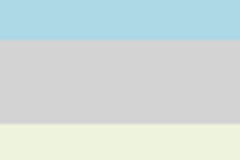

In [ ]:
img = robot["camera"].getImage()
img = img.resize((240, 160))
img

In [ ]:
robot.move(1, 0) # straight forward

In [ ]:
robot.move(-1, 0) # straight back

In [ ]:
robot.move(0.3, 0.3) # slow forward, left arc

In [ ]:
robot.move(0, -1.0) # turning right in place

Every Jyro robot is automatically equipped with a stall sensor; you don't need to explicitly add this sensor when you define a robot. The stall sensor returns a 1.0 when the robot is trying to move, but it can't, otherwise it returns 0.0. It operates like a boolean flag indicating stuck or not stuck. Try to get the robot stuck by moving it toward a wall. Then test that the stall sensor returns 1.

In [ ]:
robot.stall

0

You can create a **robot brain** by defining a function that takes the robot as a parameter, checks the current sensor readings, and executes a single movement. The brain will be repeatedly called by the simulator to create continuous behavior. When you press the Play (second button on the simulator)but will probably start automatically. When you press the Stop button, the brain will stop and the robot will return to the starting point.

In [ ]:
def avoidBrain(robot):
    sonars = robot["sonar"].getData()
    front = min(sonars[1:7])
    if front < 0.5:           # check for an obstacle
        robot.move(0.0, -1.0) # stop and turn right
    else:
        robot.move(1.0, 0)    # otherwise go straight
        
robot.brain = avoidBrain

In [19]:
vsim = VSimulator(robot, make_world) 